In [22]:
import tensorflow as tf

In [23]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

## Test One - Training Digit classifier

In [24]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [25]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()

In [26]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
X_train[0].shape

(32, 32, 3)

In [28]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [29]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [30]:
y_train_encoded = keras.utils.to_categorical(y_train, num_classes=10, dtype="float32")
y_test_encoded = keras.utils.to_categorical(y_test, num_classes=10, dtype="float32")

In [31]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(32, 32, 3)),
        keras.layers.Dense(3000, activation="relu"),
        keras.layers.Dense(1000, activation="relu"),
        keras.layers.Dense(10, activation="sigmoid")
    ])
    model.compile(optimizer="SGD",
                loss="categorical_crossentropy",
                metrics=["accuracy"]
    )
    return model

In [40]:
%%timeit -n1 -r1
# CPU
with tf.device("/CPU:0"):
    model_cpu = get_model()
    model_cpu.fit(X_train_scaled, y_train_encoded, epochs=10, batch_size=8192)

Epoch 1/10
7/7 [==============================] - 5s 705ms/step - loss: 2.3017 - accuracy: 0.1296
Epoch 2/10
7/7 [==============================] - 5s 725ms/step - loss: 2.2118 - accuracy: 0.2001
Epoch 3/10
7/7 [==============================] - 5s 707ms/step - loss: 2.1596 - accuracy: 0.2395
Epoch 4/10
7/7 [==============================] - 5s 755ms/step - loss: 2.1184 - accuracy: 0.2649
Epoch 5/10
7/7 [==============================] - 6s 771ms/step - loss: 2.0863 - accuracy: 0.2773
Epoch 6/10
7/7 [==============================] - 5s 713ms/step - loss: 2.0585 - accuracy: 0.2869
Epoch 7/10
7/7 [==============================] - 5s 765ms/step - loss: 2.0358 - accuracy: 0.2969
Epoch 8/10
7/7 [==============================] - 5s 742ms/step - loss: 2.0163 - accuracy: 0.3044
Epoch 9/10
7/7 [==============================] - 5s 723ms/step - loss: 1.9985 - accuracy: 0.3102
Epoch 10/10
7/7 [==============================] - 5s 745ms/step - loss: 1.9839 - accuracy: 0.3185
53.1 s ± 0 ns per l

In [41]:
%%timeit -n1 -r1
# GPU
with tf.device("/GPU:0"):
    model_gpu = get_model()
    model_gpu.fit(X_train_scaled, y_train_encoded, epochs = 10, batch_size=8192)

Epoch 1/10


2022-04-30 20:33:38.280103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


7/7 [==============================] - 1s 71ms/step - loss: 2.3181 - accuracy: 0.1264
Epoch 2/10
7/7 [==============================] - 0s 68ms/step - loss: 2.2176 - accuracy: 0.2030
Epoch 3/10
7/7 [==============================] - 0s 65ms/step - loss: 2.1613 - accuracy: 0.2451
Epoch 4/10
7/7 [==============================] - 0s 66ms/step - loss: 2.1203 - accuracy: 0.2656
Epoch 5/10
7/7 [==============================] - 0s 66ms/step - loss: 2.0868 - accuracy: 0.2802
Epoch 6/10
7/7 [==============================] - 0s 66ms/step - loss: 2.0596 - accuracy: 0.2932
Epoch 7/10
7/7 [==============================] - 0s 65ms/step - loss: 2.0365 - accuracy: 0.3004
Epoch 8/10
7/7 [==============================] - 0s 65ms/step - loss: 2.0167 - accuracy: 0.3080
Epoch 9/10
7/7 [==============================] - 0s 66ms/step - loss: 1.9990 - accuracy: 0.3164
Epoch 10/10
7/7 [==============================] - 0s 65ms/step - loss: 1.9832 - accuracy: 0.3241
5.39 s ± 0 ns per loop (mean ± std. dev.

## Test Two - Training Clothes Classifier

In [13]:
# loading dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 1s 0us/step


In [14]:
# checking shape

print(train_images.shape)

print(train_labels[0])

(60000, 28, 28)
9


'Ankle boot'

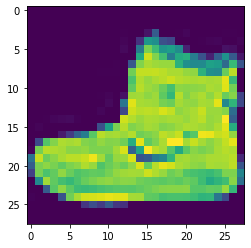

In [15]:
# checking images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.imshow(train_images[0])
class_names[train_labels[0]]

In [16]:
# scaling
train_images_scaled = train_images / 255.0
test_images_scaled = test_images / 255.0

In [17]:
def get_model(hidden_layers=1):
    # Flatten layer for input
    layers = [keras.layers.Flatten(input_shape=(28, 28))]
    # hideen layers
    for i in range(hidden_layers):
        layers.append(keras.layers.Dense(500, activation='relu'),)
    # output layer    
    layers.append(keras.layers.Dense(10, activation='sigmoid'))
    model = keras.Sequential(layers)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [21]:
%%timeit -n1 -r1
with tf.device("/CPU:0"):
    cpu_model = get_model(hidden_layers=5)
    cpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5132 - accuracy: 0.8142
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3871 - accuracy: 0.8605
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3537 - accuracy: 0.8740
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3253 - accuracy: 0.8827
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3095 - accuracy: 0.8873
39.4 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [20]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model(hidden_layers=5)
    gpu_model.fit(train_images_scaled, train_labels, epochs=5)

Epoch 1/5
   7/1875 [..............................] - ETA: 19s - loss: 1.9921 - accuracy: 0.2455  

2022-04-30 20:20:04.140101: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 12s 6ms/step - loss: 0.5197 - accuracy: 0.8137
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3907 - accuracy: 0.8600
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3523 - accuracy: 0.8731
Epoch 4/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3254 - accuracy: 0.8827
Epoch 5/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3079 - accuracy: 0.8875
59.1 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
